In [71]:
import re
import tempfile
import io
from PIL import Image, ImageEnhance
from scipy.misc import toimage
from pytesseract import image_to_string
from IPython.display import display
import numpy as np
import cv2
import requests


def request_captcha_test():
    headers = {'Content-type': 'image/png'}
    cookie = {
        'session': 'eyJibG9iIjp7IiBiIjoiTDFaR1ZsRlZRMG8zWjJwR2RsRnFVRmhOU21kdFFUMDkifX0.DeEzmQ.E6q0lzlAkeGeJ4FnLKzZXYFydoA'}
    img = requests.get('http://xn--5z8h.ctf:5000/captcha', cookies=cookie, headers=headers)

    if img.status_code == 200:
        img = img.content
    else:
        print('error: {}'.format(img.url))

    # print(image_to_string(Image.open(io.BytesIO(img))))
    return img





def send_captcha_test():
    url = 'http://xn--5z8h.ctf:5000/captcha'
    cookies = {
        'session': 'eyJibG9iIjp7IiBiIjoiTDFaR1ZsRlZRMG8zWjJwR2RsRnFVRmhOU21kdFFUMDkifX0.DeEzmQ.E6q0lzlAkeGeJ4FnLKzZXYFydoA'}
    data = {'captcha': '977rll'}

    with requests.Session() as s:
        r = s.post(url, cookies=cookies, data=data)
        #print(r.text)
        return requests.utils.dict_from_cookiejar(s.cookies)
        #print(requests.utils.dict_from_cookiejar(s.cookies))
        #rint(requests.utils.dict_from_cookiejar(r.cookies))


def request_captcha(cookie):
    headers = {'Content-type': 'image/png'}
    img = requests.get('http://xn--5z8h.ctf:5000/captcha', cookies=cookie, headers=headers)

    if img.status_code == 200:
        img = img.content
    else:
        print('error: {}'.format(img.url))

    # print(image_to_string(Image.open(io.BytesIO(img))))
    return img


def send_captcha(cookie, captcha):
    url = 'http://xn--5z8h.ctf:5000/captcha'
    data = {'captcha': captcha}

    with requests.Session() as s:
        r = s.post(url, cookies=cookie, data=data)
        print(re.search('<li>(.*?)</li>', r.text).group(1))
        return requests.utils.dict_from_cookiejar(r.cookies)


def clean_captcha(captcha):
    # Convert the image file to a Numpy array and read it into a OpenCV file.
    captcha = np.asarray(bytearray(captcha), dtype="uint8")
    captcha = cv2.imdecode(captcha, cv2.IMREAD_GRAYSCALE)

    # Let's first see what the original image looks like.
    # print('before:')
    # display(toimage(captcha))

    # Convert the captcha to black and white.
    #(thresh, captcha) = cv2.threshold(captcha, 120, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    # Erode the image to remove dot noise and that wierd line. I use a 3x3 rectengal as the kernal.
    #captcha = cv2.erode(captcha, np.ones((3, 3), dtype=np.uint8))

    # Convert the image to black and white and again to further remove noise.
    (thresh, captcha) = cv2.threshold(captcha, 230, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    # Some cosmetic
    #captcha = cv2.fastNlMeansDenoising(captcha, h=60)

    # Turn the Numpy array back into a image
    captcha = toimage(captcha)
    #captcha = captcha.resize([captcha.width * 10, captcha.height * 10])

    # Check the result of our cleaning process
    #print('after:')
    display(captcha)

    return captcha


def captcha_tostring(captcha):
    text = image_to_string(captcha, config="-c tessedit_char_whitelist=0123456789abcdefghijklmnopqrstuvwxyz -psm 6")
    # text = captcha
    text = re.sub('\|', 'l', text)
    text = text.replace("‘", "i")
    text = text.replace(" ", "")
    text = text.replace("]", "j")
    text = text.replace("><", "x")
    text = text.lower()
    print(text)
    return text


def new_captcha(cookie):
    img = request_captcha(cookie)
    captcha = clean_captcha(img)
    return captcha_tostring(captcha)


def solve():
    first_cookie = cookies = {
        'session': 'eyJibG9iIjp7IiBiIjoiTDFaR1ZsRlZRMG8zWjJwR2RsRnFVRmhOU21kdFFUMDkifX0.DeEzmQ.E6q0lzlAkeGeJ4FnLKzZXYFydoA'}
    next_cookie = send_captcha(first_cookie, '977rll')

    for i in range(5000):
        next_cookie = send_captcha(next_cookie, new_captcha(next_cookie))
        

Sucess, you currently have 1 success. You need 5000 for the flag


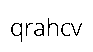

qrahcv
Sucess, you currently have 2 success. You need 5000 for the flag


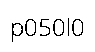

po5ow0
ERROR: Resetting to zero.


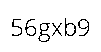

56gxb9
Sucess, you currently have 1 success. You need 5000 for the flag


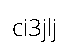

03m
ERROR: Resetting to zero.


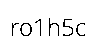

rmh5c
ERROR: Resetting to zero.


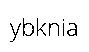

ybkma
ERROR: Resetting to zero.


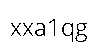

xxawqg
ERROR: Resetting to zero.


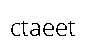

ctaeet
Sucess, you currently have 1 success. You need 5000 for the flag


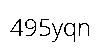

495yqn
Sucess, you currently have 2 success. You need 5000 for the flag


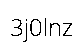

3pm
ERROR: Resetting to zero.


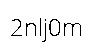

2mj0m
ERROR: Resetting to zero.


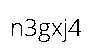

n3ng4
ERROR: Resetting to zero.


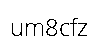

um8cfz
Sucess, you currently have 1 success. You need 5000 for the flag


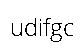

udxfgc
ERROR: Resetting to zero.


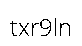

txr9m
ERROR: Resetting to zero.


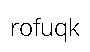

rofuqk
Sucess, you currently have 1 success. You need 5000 for the flag


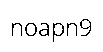

noapn9
Sucess, you currently have 2 success. You need 5000 for the flag


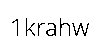

wkrahw
ERROR: Resetting to zero.


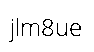

jm8ue
ERROR: Resetting to zero.


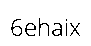

6ehaxx
ERROR: Resetting to zero.


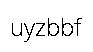

uyzbbf
Sucess, you currently have 1 success. You need 5000 for the flag


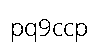

pq9ccp
Sucess, you currently have 2 success. You need 5000 for the flag


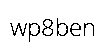

wp8ben
Sucess, you currently have 3 success. You need 5000 for the flag


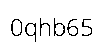

0qhb65
Sucess, you currently have 4 success. You need 5000 for the flag


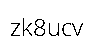

zk8ucv
Sucess, you currently have 5 success. You need 5000 for the flag


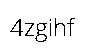

4233th
ERROR: Resetting to zero.


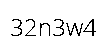

32n3w4
Sucess, you currently have 1 success. You need 5000 for the flag


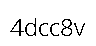

4dcc8v
Sucess, you currently have 2 success. You need 5000 for the flag


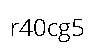

r40cg5
Sucess, you currently have 3 success. You need 5000 for the flag


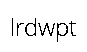

vdwpt
ERROR: Resetting to zero.


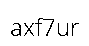

axf7ur
Sucess, you currently have 1 success. You need 5000 for the flag


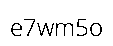

e7wm5o
Sucess, you currently have 2 success. You need 5000 for the flag


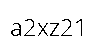

a2xz2w
ERROR: Resetting to zero.


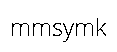

mmsymk
Sucess, you currently have 1 success. You need 5000 for the flag


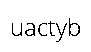

uactyb
Sucess, you currently have 2 success. You need 5000 for the flag


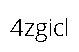

4zgxd
ERROR: Resetting to zero.


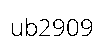

ub2909
Sucess, you currently have 1 success. You need 5000 for the flag


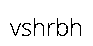

vshrbh
Sucess, you currently have 2 success. You need 5000 for the flag


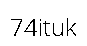

7mm
ERROR: Resetting to zero.


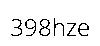

398hze
Sucess, you currently have 1 success. You need 5000 for the flag


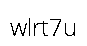

wm7u
ERROR: Resetting to zero.


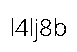

mwgb
ERROR: Resetting to zero.


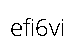

efx6vx
ERROR: Resetting to zero.


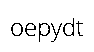

0epydt
ERROR: Resetting to zero.


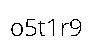

051w
ERROR: Resetting to zero.


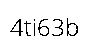

4tw63b
ERROR: Resetting to zero.


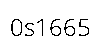

051665
ERROR: Resetting to zero.


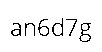

an6d7g
Sucess, you currently have 1 success. You need 5000 for the flag


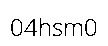

04hsm0
Sucess, you currently have 2 success. You need 5000 for the flag


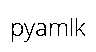

pyarmk
ERROR: Resetting to zero.


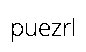

puezw
ERROR: Resetting to zero.


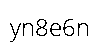

yn8e6n
Sucess, you currently have 1 success. You need 5000 for the flag


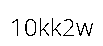

10kk2w
Sucess, you currently have 2 success. You need 5000 for the flag


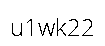

u1wk22
Sucess, you currently have 3 success. You need 5000 for the flag


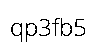

qp3fb5
Sucess, you currently have 4 success. You need 5000 for the flag


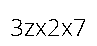

32x2x7
ERROR: Resetting to zero.


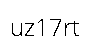

uz17rt
Sucess, you currently have 1 success. You need 5000 for the flag


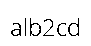

aha2cd
ERROR: Resetting to zero.


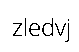

zhadvj
ERROR: Resetting to zero.


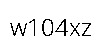

ww04x2
ERROR: Resetting to zero.


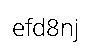

efd8nj
Sucess, you currently have 1 success. You need 5000 for the flag


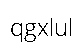

qum
ERROR: Resetting to zero.


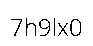

7h9k0
ERROR: Resetting to zero.


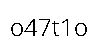

047m0
ERROR: Resetting to zero.


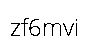

zf6mvx
ERROR: Resetting to zero.


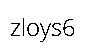

zbys6
ERROR: Resetting to zero.


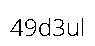

49am
ERROR: Resetting to zero.


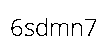

6sdmn7
Sucess, you currently have 1 success. You need 5000 for the flag


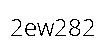

2ew282
Sucess, you currently have 2 success. You need 5000 for the flag


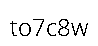

t07c8w
ERROR: Resetting to zero.


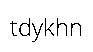

tdykhn
Sucess, you currently have 1 success. You need 5000 for the flag


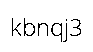

kbnqj3
Sucess, you currently have 2 success. You need 5000 for the flag


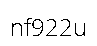

nf922u
Sucess, you currently have 3 success. You need 5000 for the flag


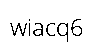

wxacq6
ERROR: Resetting to zero.


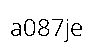

a087je
Sucess, you currently have 1 success. You need 5000 for the flag


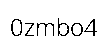

02mb04
ERROR: Resetting to zero.


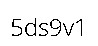

5ds9w
ERROR: Resetting to zero.


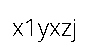

xwxzj
ERROR: Resetting to zero.


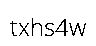

txhs4w
Sucess, you currently have 1 success. You need 5000 for the flag


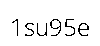

wsu95e
ERROR: Resetting to zero.


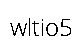

wmo5
ERROR: Resetting to zero.


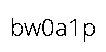

bwoawp
ERROR: Resetting to zero.


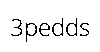

3pedds
Sucess, you currently have 1 success. You need 5000 for the flag


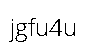

jgfu4u
Sucess, you currently have 2 success. You need 5000 for the flag


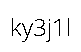

ky3m
ERROR: Resetting to zero.


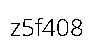

KeyboardInterrupt: 

In [72]:
solve()